In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
plt.style.use('ggplot')

%matplotlib inline

In [4]:
from src.Cleaner import *

In [5]:
df = pd.read_csv('data/Colorectal_GSE44076.csv')
df2 = pd.read_csv('data/Colorectal_GSE21510.csv')

In [6]:
df.head()

,samples,type,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,648,normal,4.033083,3.991328,3.522487,3.278373,7.201681,2.166355,2.841044,2.217360,...,2.233052,2.321627,2.602364,2.272951,8.236181,4.766301,6.624126,2.191907,2.089431,2.196678
1,649,normal,3.117273,4.047258,3.042704,3.284518,8.425413,2.139838,2.632561,2.375537,...,2.033923,2.335442,2.061999,1.979024,7.079312,4.687041,5.775218,2.013578,2.189192,2.106554
2,650,normal,3.513162,4.154993,3.067877,3.478020,7.337592,2.070858,2.632643,2.542989,...,1.874741,2.522885,2.577079,2.017303,6.966157,3.498785,5.384117,2.124996,2.175054,2.168932
3,651,normal,3.487588,4.505968,3.688899,3.642465,7.319168,2.191685,2.567842,2.551201,...,1.795535,2.147798,2.439898,2.157677,8.899968,6.943802,7.908001,1.969787,2.125711,2.311073
4,652,normal,3.096174,3.997803,3.404045,2.984088,7.652969,2.374705,2.178836,2.852997,...,1.965137,2.655806,2.330900,2.230463,7.878767,5.718627,6.654383,2.015329,2.339691,2.347252


In [33]:
lb = LabelEncoder()
df2['type'] = lb.fit_transform(df2['type'])


In [35]:
df2['type'].unique()

array([1, 0, 2], dtype=int64)

In [16]:
#Check for null values
df.isnull().any(axis=1).unique()

#Check how many normal and cancer there are
target_label_count = pd.DataFrame(df.groupby('type')['type'].count())
target_label_count.rename({'type': 'Count'}, axis=1, inplace=True)

target_label_count

,Count
type,
adenocarcinoma,97
normal,97


In [5]:
mask = df['type'] == 'normal'
df['type'] = mask.astype(int)

In [6]:
df.drop(columns='samples', inplace=True)
df.rename({'type': 'target'}, axis=1, inplace=True)
df.groupby('target')['target'].count()



target
0    97
1    97
Name: target, dtype: int64

In [7]:
labels = ['Normal', 'Adenocarcinoma']

In [8]:
X = df.drop(columns='target')
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)

In [10]:
#Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

32


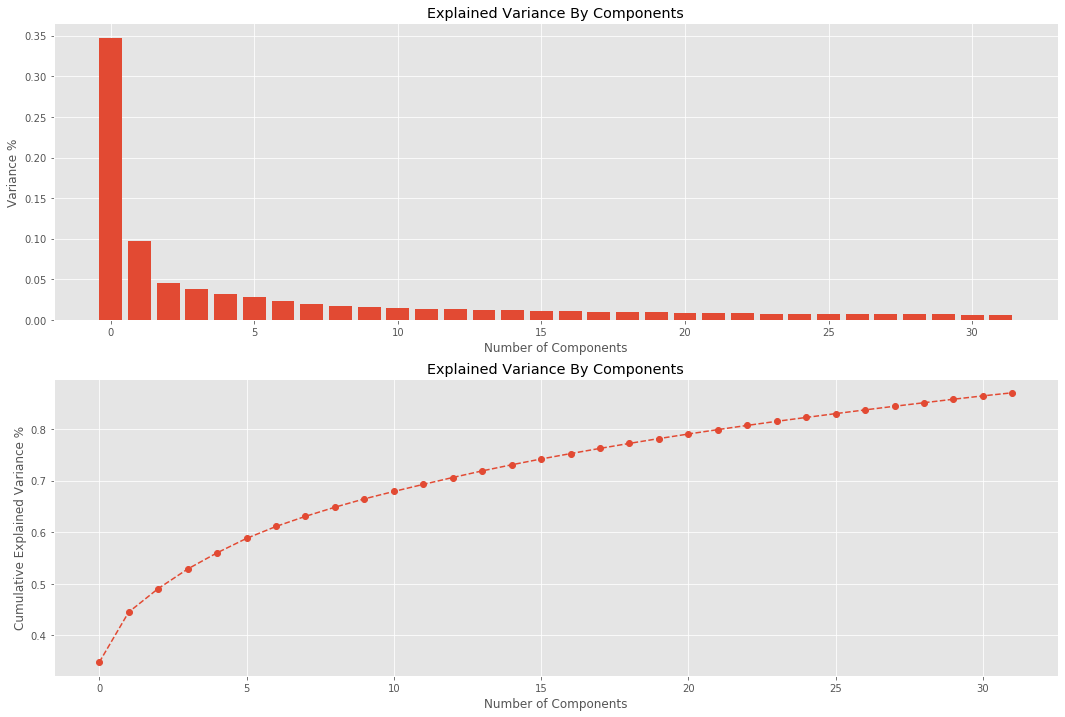

In [11]:
pcd = PCA()
pcd.fit_transform(X_train)
total_variance = sum(pcd.explained_variance_)
curr_variance = 0
k = 0
while curr_variance/total_variance < .80:
    curr_variance += pcd.explained_variance_[k]
    k += 1
    

features = range(k)
pcd = PCA(n_components=k)
X_train_pca = pcd.fit_transform(X_test)
X_test_pca = pcd.transform(X_test)

variance = pcd.explained_variance_ratio_
cumsum_variance = pcd.explained_variance_ratio_.cumsum()

fig, axs = plt.subplots(2,1, figsize=(18,12))
ax = axs.flatten()
ax[0].bar(features, variance)
ax[0].set_ylabel('Variance %')
ax[0].set_xlabel('Number of Components')
ax[0].set_title('Explained Variance By Components')


ax[1].plot(features, cumsum_variance, marker='o', linestyle='--')
ax[1].set_ylabel('Cumulative Explained Variance %')
ax[1].set_xlabel('Number of Components')
ax[1].set_title('Explained Variance By Components')
print(k)

## Plot the first 3 PCA

In [15]:
pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()

<Figure size 432x288 with 0 Axes>